In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
airlines_df = pd.read_csv('East_std.csv')

NameError: name 'pd' is not defined

## EDA

In [4]:
airlines_df.head()

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [5]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3999 non-null   int64  
 1   Balance            3999 non-null   float64
 2   Qual_miles         3999 non-null   float64
 3   cc1_miles          3999 non-null   float64
 4   cc2_miles          3999 non-null   float64
 5   cc3_miles          3999 non-null   float64
 6   Bonus_miles        3999 non-null   float64
 7   Bonus_trans        3999 non-null   float64
 8   Flight_miles_12mo  3999 non-null   float64
 9   Flight_trans_12    3999 non-null   float64
 10  Days_since_enroll  3999 non-null   float64
 11  Award?             3999 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 375.0 KB


In [6]:
airlines_df.describe()

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,1999.000000,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,1154.556192,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,999.500000,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,1999.000000,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,2998.500000,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,3998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
airlines_df.drop({'Unnamed: 0', 'Balance', 'Bonus_trans', 'Flight_trans_12', 'Days_since_enroll'}, axis=1, inplace=True)

In [8]:
airlines_df.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.000000,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.000000,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.000000,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.000000,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.067398,1.0


### DBScan

In [9]:
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [23]:
eps_ = np.arange(0.3, 1.1, 0.1)
min_samples = np.arange(3, 13)
params = product(eps_, min_samples)

In [24]:
for eps, min_sample in params:
    db = DBSCAN(eps=eps, min_samples=min_sample).fit(airlines_df)
    labels = db.labels_
    cluster_count = len(set(labels))
    
    if cluster_count > 1:
        silhouette = silhouette_score(airlines_df, labels)
        print(f"eps = {eps:.2f}, min_samples = {min_sample}, count = {cluster_count}, score = {silhouette:.2f}")
    else:
        print("cluster count is very small")

eps = 0.30, min_samples = 3, count = 8, score = 0.43
eps = 0.30, min_samples = 4, count = 7, score = 0.45
eps = 0.30, min_samples = 5, count = 7, score = 0.45
eps = 0.30, min_samples = 6, count = 7, score = 0.45
eps = 0.30, min_samples = 7, count = 6, score = 0.45
eps = 0.30, min_samples = 8, count = 6, score = 0.45
eps = 0.30, min_samples = 9, count = 6, score = 0.45
eps = 0.30, min_samples = 10, count = 5, score = 0.44
eps = 0.30, min_samples = 11, count = 5, score = 0.44
eps = 0.30, min_samples = 12, count = 4, score = 0.54
eps = 0.40, min_samples = 3, count = 7, score = 0.45
eps = 0.40, min_samples = 4, count = 7, score = 0.45
eps = 0.40, min_samples = 5, count = 8, score = 0.44
eps = 0.40, min_samples = 6, count = 7, score = 0.45
eps = 0.40, min_samples = 7, count = 6, score = 0.45
eps = 0.40, min_samples = 8, count = 6, score = 0.45
eps = 0.40, min_samples = 9, count = 6, score = 0.45
eps = 0.40, min_samples = 10, count = 5, score = 0.44
eps = 0.40, min_samples = 11, count = 5, s

In [25]:
model = DBSCAN(eps=0.50, min_samples=3).fit(airlines_df)

In [26]:
airlines_df.columns

Index(['Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Flight_miles_12mo', 'Award?'],
      dtype='object')

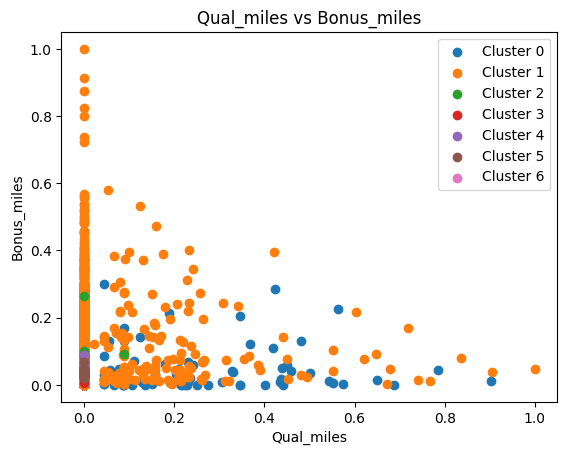

In [27]:
plt.xlabel('Qual_miles')
plt.ylabel('Bonus_miles')
plt.title('Qual_miles vs Bonus_miles')

for i in range(7):
    plt.scatter(airlines_df['Qual_miles'][model.labels_ == i], 
                airlines_df['Bonus_miles'][model.labels_ == i],
                label = f"Cluster {i}")

plt.legend();